In [1]:
from sympy.printing.theanocode import theano_function


In [2]:
import sympy as sp

In [3]:
def SympyGaussian2D(x, y, A, xc, yc, sigma):
    return A*sp.exp(
        -(
            (x-xc)**2 + 
            (y-yc)**2
        )/(2*sigma**2))

In [4]:
def Gaussian2D(x, y, A, xc, yc, sigma):
    return A*np.exp(
        -(
            (x-xc)**2 + 
            (y-yc)**2
        )/(2*sigma**2))

In [5]:
import numpy as np
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)

X, Y = np.meshgrid(x,y)

positions = np.random.randint(0,5, size=(1000000, 2)).astype(float)
XC, YC = positions.T
AMP = np.ones(XC.shape)
SIGMA = np.ones(XC.shape) * 0.2

X = X[:, :, np.newaxis]
Y = Y[:, :, np.newaxis]
AMP1 = AMP[None, None, :]
SIGMA1 = SIGMA[None, None, :]
XC1 = XC[None, None, :]
YC1 = YC[None, None, :]



In [6]:
# %%time
# img1 = func(X, Y, AMP, XC, YC, SIGMA).sum(-1)

In [7]:
# %%time
# img2 = func2(X, Y, AMP, XC, YC, SIGMA, len(positions))

In [8]:
%%timeit
bilde = np.zeros(X.shape)

for pos in atoms.positions:
    atom = Gaussian2D(X, Y, 5, pos[0], pos[1], 0.2)
    bilde += atom

In [9]:
from ase.build import nanotube
from ase.visualize import view
#atoms = nanotube(100, 10, length=3)
atoms = nanotube(10, 10, length=3)

In [14]:
xlow, ylow, zlow = atoms.positions.min(0) - 3
xhigh, yhigh, zhigh = atoms.positions.max(0) + 3

scale = 0.17
xr = np.arange(ylow, yhigh+scale, scale)
yr = np.arange(zlow, zhigh+scale, scale)

X, Y = np.meshgrid(xr,yr)
X = X[:, :]
Y = Y[:, :]

AMP = atoms.numbers
xc, yc, zc = atoms.positions.T
XC, YC = yc, zc
SIGMA = np.ones(len(atoms)) * 0.25


AMP1 = AMP[None, None, :]
SIGMA1 = SIGMA[None, None, :]
XC1 = XC[None, None, :]
YC1 = YC[None, None, :]

x, y = sp.symbols('x y')
i, n = sp.symbols("i n", integer=True)
xc, yc, A, sigma = sp.symbols('xc yc A sigma', cls=sp.IndexedBase)
Gauss = SympyGaussian2D(x, y, A[i], xc[i], yc[i], sigma[i])
model = sp.Sum(Gauss, (i,0,n-1))
variables = (x,y, A, xc, yc, sigma, n)
func2 = sp.lambdify(variables, model, modules='numpy')


In [15]:
def DoRotation(xspan, yspan, RotRad=0):
    """Generate a meshgrid and rotate it by RotRad radians."""

    # Clockwise, 2D rotation matrix
    RotMatrix = np.array([[np.cos(RotRad),  np.sin(RotRad)],
                          [-np.sin(RotRad), np.cos(RotRad)]])

    x, y = np.meshgrid(xspan, yspan)
    return np.einsum('ji, mni -> jmn', RotMatrix, np.dstack([x, y]))

In [26]:
%%timeit
img = func2(X, Y, AMP, XC, YC, SIGMA, len(atoms))

100 loops, best of 5: 19.5 ms per loop


In [ ]:
%%timeit
img = func2(X, Y, AMP, XC, YC, SIGMA, len(atoms))

In [382]:
%%time 
img = func2(X, Y, AMP, XC, YC, SIGMA, len(atoms))

Wall time: 35.4 s


In [383]:
%matplotlib inline

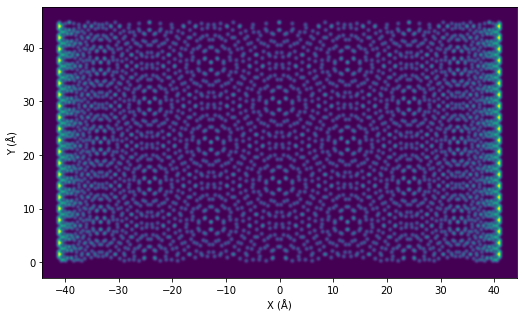

In [385]:
plt.figure(figsize=(10,5))
plt.imshow(img, extent=((ylow, yhigh, zlow, zhigh)))
plt.xlabel('X (Å)')
plt.ylabel('Y (Å)')
plt.savefig('nanotube.png', dpi=200, bbox_inches='tight')

In [386]:
atoms

Atoms(symbols='C4440', pbc=[False, False, True], cell=[0.0, 0.0, 44.88188498715265])

In [289]:
xlow, ylow, zlow = atoms.positions.min(0) - 3
xhigh, yhigh, zhigh = atoms.positions.max(0) + 3

scale = 0.2
xr = np.arange(ylow, yhigh+scale, scale)
yr = np.arange(zlow, zhigh+scale, scale)

X, Y = np.meshgrid(xr,yr)
X = X[:, :, np.newaxis]
Y = Y[:, :, np.newaxis]

AMP = atoms.numbers[None, None, :]
xc, yc, zc = atoms.positions.T
SIGMA = np.ones(len(atoms)) * 0.3
SIGMA = SIGMA[None, None, :]
XC = yc[None, None, :]
YC = zc[None, None, :]


In [314]:
#%%timeit
x, y, xc, yc, A, sigma = sp.symbols('x y xc yc A sigma')
model = SympyGaussian2D(x, y, A, xc, yc, sigma)
func = sp.lambdify((x,y, A, xc, yc, sigma), model, modules='numexpr')
img = func(X,Y, AMP, XC, YC, SIGMA)
img = img.sum(-1)


In [291]:
plt.figure()
plt.imshow(img)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [292]:
###### 
xlow, ylow, zlow = atoms.positions.min(0) - 3
xhigh, yhigh, zhigh = atoms.positions.max(0) + 3

scale = 0.1
xr = np.arange(ylow, yhigh+scale, scale)
yr = np.arange(zlow, zhigh+scale, scale)

X, Y = np.meshgrid(xr,yr)
X = X[:, :]
Y = Y[:, :]

AMP = atoms.numbers
SIGMA = np.ones(len(atoms)) * 0.3
xc, yc, zc = atoms.positions.T
XC = yc
YC = zc

#%%time

x, y, i, n = sp.symbols('x y i n')
xc, yc, A, sigma = sp.symbols('xc yc A sigma', cls=sp.IndexedBase)
Gauss = SympyGaussian2D(x, y, A[i], xc[i], yc[i], sigma[i])
model = Sum(Gauss, (i,0,n-1))
func2 = sp.lambdify((x,y, A, xc, yc, sigma, n), model, modules='numpy')

In [294]:
#%%timeit
img = func2(X,Y, AMP, XC, YC, SIGMA, len(atoms))


In [295]:
plt.figure()
plt.imshow(img)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [36]:
%%timeit
func = sp.lambdify((x,y), model, modules='numexpr')
func(X,Y)

437 µs ± 4.33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [27]:
%%timeit
func(X,Y)

1.9 ms ± 14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
model

3.4822022531845*exp(-4.59972756733564*x**2 - 4.59972756733564*y**2) + 3.4822022531845*exp(-4.59972756733564*(x - 2)**2 - 4.59972756733564*(y - 2)**2) + 3.4822022531845*exp(-4.59972756733564*(x - 1)**2 - 4.59972756733564*(y - 1)**2)

In [13]:
import matplotlib.pyplot as plt

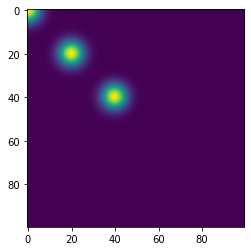

In [14]:
plt.figure()
plt.imshow(bilde)